In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pylab
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, KFold
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [2]:
# import data

df = pd.read_csv("/Users/idaba/OneDrive/Desktop/BANA 698/Data.csv")

In [3]:
# get column names

df.columns

Index(['CountryID', 'Year', 'CountryName', 'Region', 'IncomeLevel', 'FDINet',
       'FDIInflowstoGDP', 'FDIInflows', 'FDIOutflowsPercent', 'FDIOutflows',
       'GDP', 'GDPGrowth', 'GrossNationalSpending', 'InflationConsumerPrices',
       'InflationRate', 'InflationPercent', 'GoodsNetTrade',
       'GoodsandServicesNetTrade', 'TradePercent', 'ServicesTradedPercent',
       'Government Spending to GDP', 'Government Spending Annual Growth',
       'Government Spending', 'Government Education Spending to GDP',
       'Government Education Spending to Total Spending',
       'Government Military Spending to GDP',
       'Government Military Spending to Total Spending',
       'Government Military Spending', 'ElectricityAccess',
       'AgriculturalCarbonDioxide', 'TransportCarbonDioxide',
       'WasteCarbonDioxide', 'ForestArea', 'RenewableEnergyConsumption',
       'TotalGreenhouseGas', 'LongTermExternalDebt', 'TotalPSD', 'LongTermPSD',
       'ShortTermPSD', 'InterestPaymentsPercent',

In [4]:
# see the shape

df.shape

(651, 59)

In [5]:
# see statistics 

df.describe().round()

,Year,FDINet,FDIInflowstoGDP,FDIInflows,FDIOutflowsPercent,FDIOutflows,GDP,GDPGrowth,GrossNationalSpending,InflationConsumerPrices,...,BasicHandwashing,PovertyRatio,NationalPovertyRatio,SocialPovertyRatio,UnemploymentwithAdvancedEducation,UnemploymentwithBasicEducation,UnemploymentWithintermediateEducation,TotalUnemployment,YouthUnemployment,ExchangeRate
count,651.0,5.080000e+02,540.0,5.510000e+02,500.0,5.110000e+02,6.090000e+02,610.0,4.900000e+02,511.0,...,160.0,87.0,103.0,103.0,304.0,310.0,305.0,331.0,326.0,611.0
mean,2022.0,1.831873e+09,4.0,9.259408e+09,2.0,1.120022e+10,4.955280e+11,4.0,6.037665e+11,10.0,...,54.0,9.0,22.0,22.0,7.0,9.0,8.0,7.0,16.0,811.0
std,1.0,2.839158e+10,29.0,4.560999e+10,27.0,4.888731e+10,2.271615e+12,6.0,2.552528e+12,24.0,...,32.0,18.0,14.0,11.0,5.0,8.0,7.0,5.0,11.0,3766.0
min,2021.0,-1.650000e+11,-360.0,-3.090000e+11,-360.0,-3.320000e+11,5.906598e+07,-29.0,3.731023e+08,-7.0,...,3.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2021.0,-2.442444e+09,1.0,7.749717e+07,0.0,1.689923e+06,8.342244e+09,2.0,1.626452e+10,3.0,...,22.0,1.0,13.0,15.0,3.0,4.0,4.0,4.0,9.0,1.0
50%,2022.0,-5.379498e+08,2.0,8.004435e+08,0.0,8.737283e+07,3.388693e+10,4.0,5.457113e+10,6.0,...,58.0,2.0,20.0,21.0,5.0,8.0,7.0,5.0,14.0,9.0
75%,2023.0,-2.142594e+07,5.0,5.555248e+09,1.0,2.395132e+09,2.460000e+11,6.0,3.242500e+11,9.0,...,85.0,4.0,26.0,26.0,8.0,12.0,10.0,8.0,21.0,142.0
max,2023.0,1.780000e+11,434.0,4.760000e+11,349.0,4.540000e+11,2.770000e+13,75.0,2.850000e+13,359.0,...,97.0,81.0,74.0,66.0,32.0,43.0,57.0,34.0,65.0,42000.0


In [6]:
# look for null values

df.isna().sum()

CountryID                                            0
Year                                                 0
CountryName                                          0
Region                                               0
IncomeLevel                                          3
FDINet                                             143
FDIInflowstoGDP                                    111
FDIInflows                                         100
FDIOutflowsPercent                                 151
FDIOutflows                                        140
GDP                                                 42
GDPGrowth                                           41
GrossNationalSpending                              161
InflationConsumerPrices                            140
InflationRate                                       43
InflationPercent                                    43
GoodsNetTrade                                      139
GoodsandServicesNetTrade                           139
TradePerce

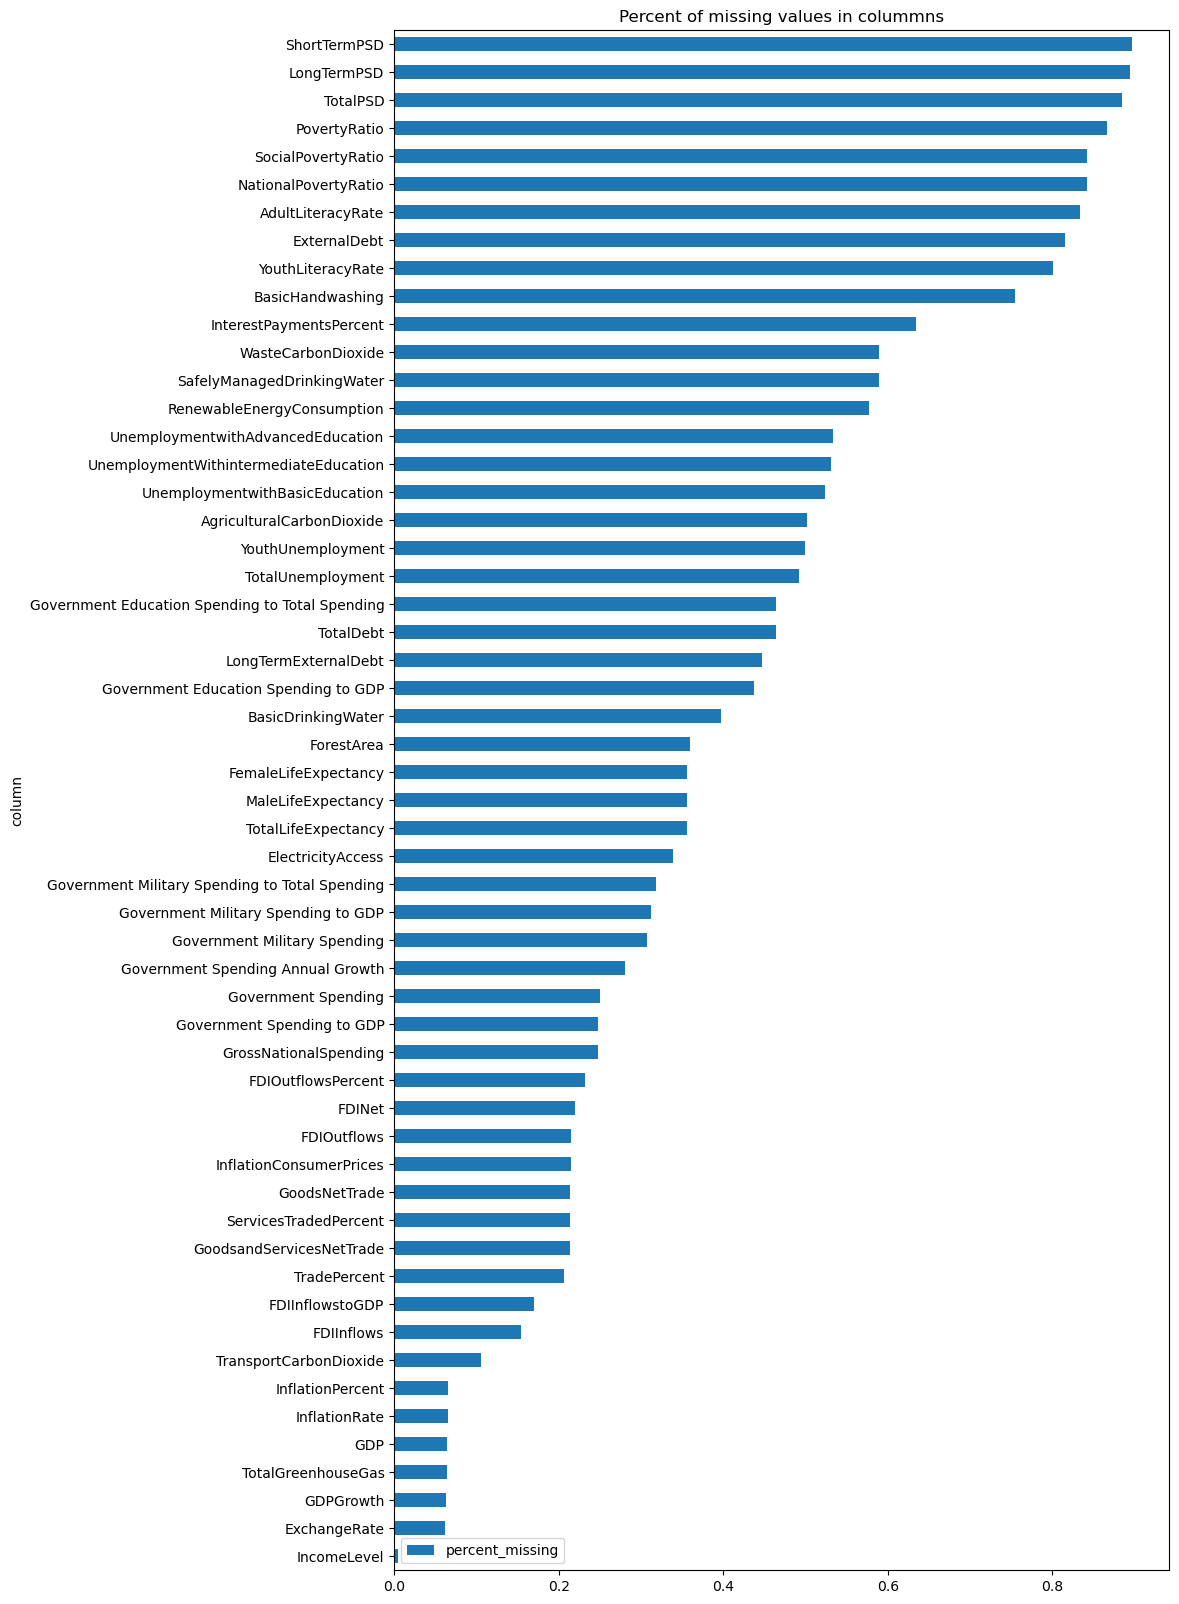

In [7]:
# visualize null values

def plot_missing_values(df):
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['column', 'percent_missing']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('percent_missing')
    pylab.rcParams['figure.figsize'] = (10, 20)
    missing_df.plot(kind='barh', x='column', y='percent_missing'); 
    plt.title('Percent of missing values in colummns');
plot_missing_values(df)

In [8]:
# get the 2021 data seperately

df21 = df[df['Year'] == 2021]
df21 = df21.reset_index(drop=True)

In [9]:
# see the shape for 2021 data

df21.shape

(217, 59)

In [10]:
# get the 2022 data seperately

df22 = df[df['Year'] == 2022]
df22 = df21.reset_index(drop=True)

In [11]:
# see the shape for 2022 data

df22.shape

(217, 59)

In [12]:
# get the 2023 data seperately

df23 = df[df['Year'] == 2023]
df23 = df23.reset_index(drop=True)

In [13]:
# see the shape for 2023 data

df23.shape

(217, 59)

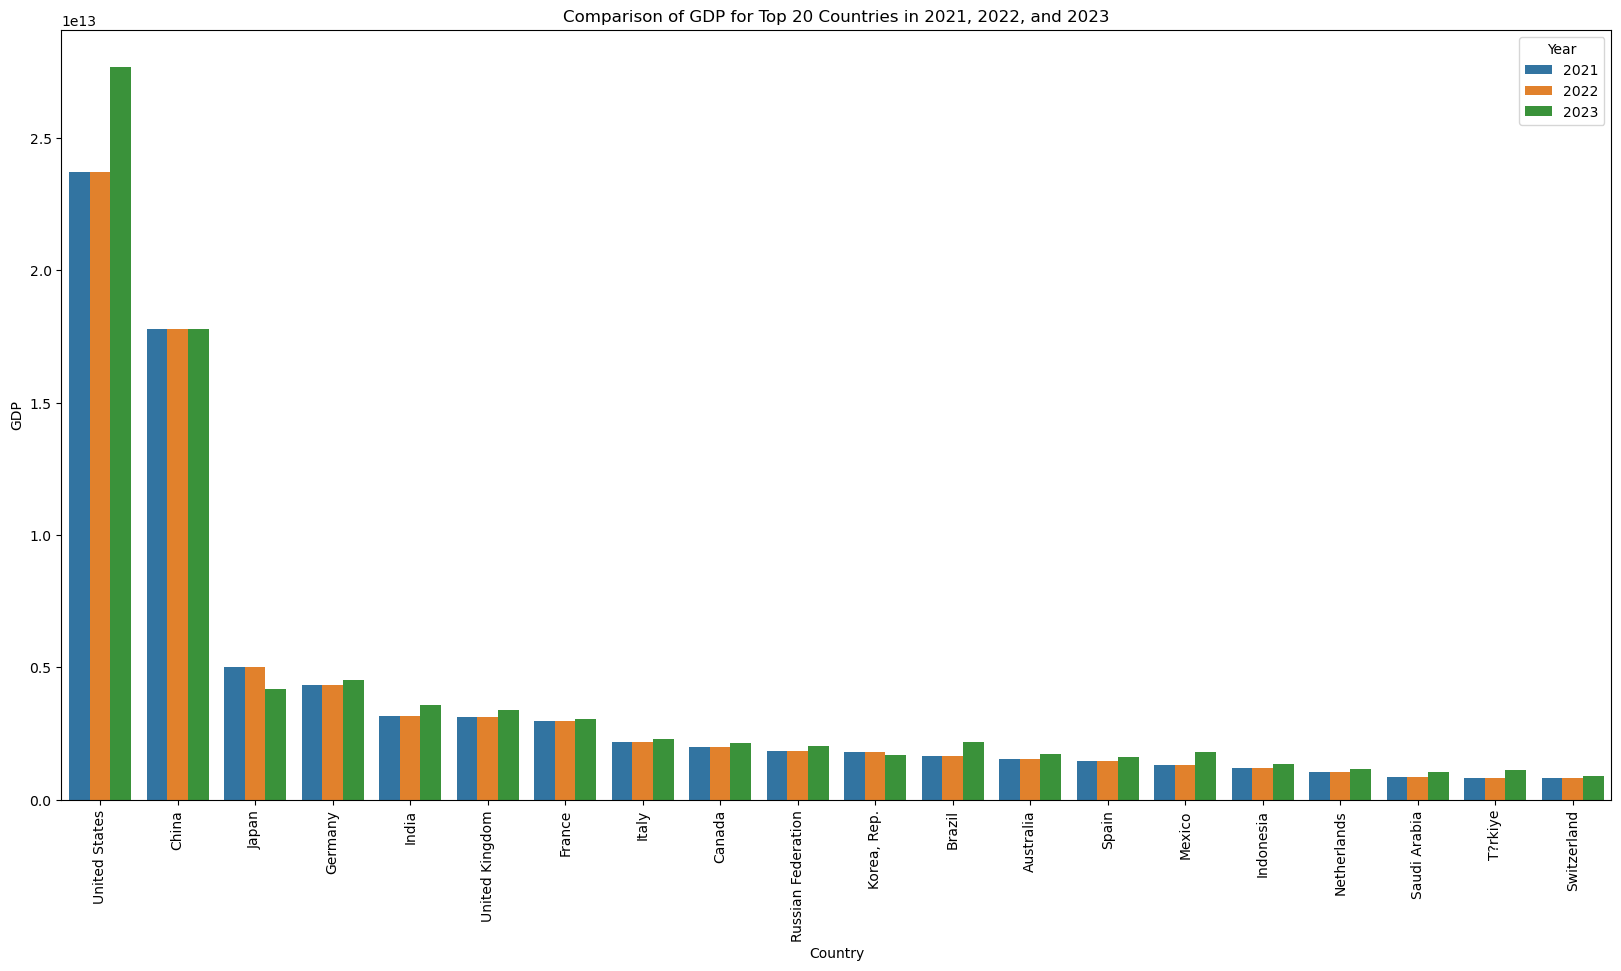

In [14]:
# change of GDP for top 20 countries from 2021 to 2023

top20_gdp_2021 = df21.sort_values(by='GDP', ascending=False).head(20)
top20_gdp_2022 = df22.sort_values(by='GDP', ascending=False).head(20)
top20_gdp_2023 = df23.sort_values(by='GDP', ascending=False).head(20)
top20_gdp_2021['Year'] = 2021
top20_gdp_2022['Year'] = 2022
top20_gdp_2023['Year'] = 2023
combined_gdp = pd.concat([top20_gdp_2021, top20_gdp_2022, top20_gdp_2023])
plt.figure(figsize=(20, 10))
sns.barplot(x='CountryName', y='GDP', hue='Year', data=combined_gdp)
plt.xticks(rotation=90)
plt.title('Comparison of GDP for Top 20 Countries in 2021, 2022, and 2023')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.legend(title='Year')
plt.show()

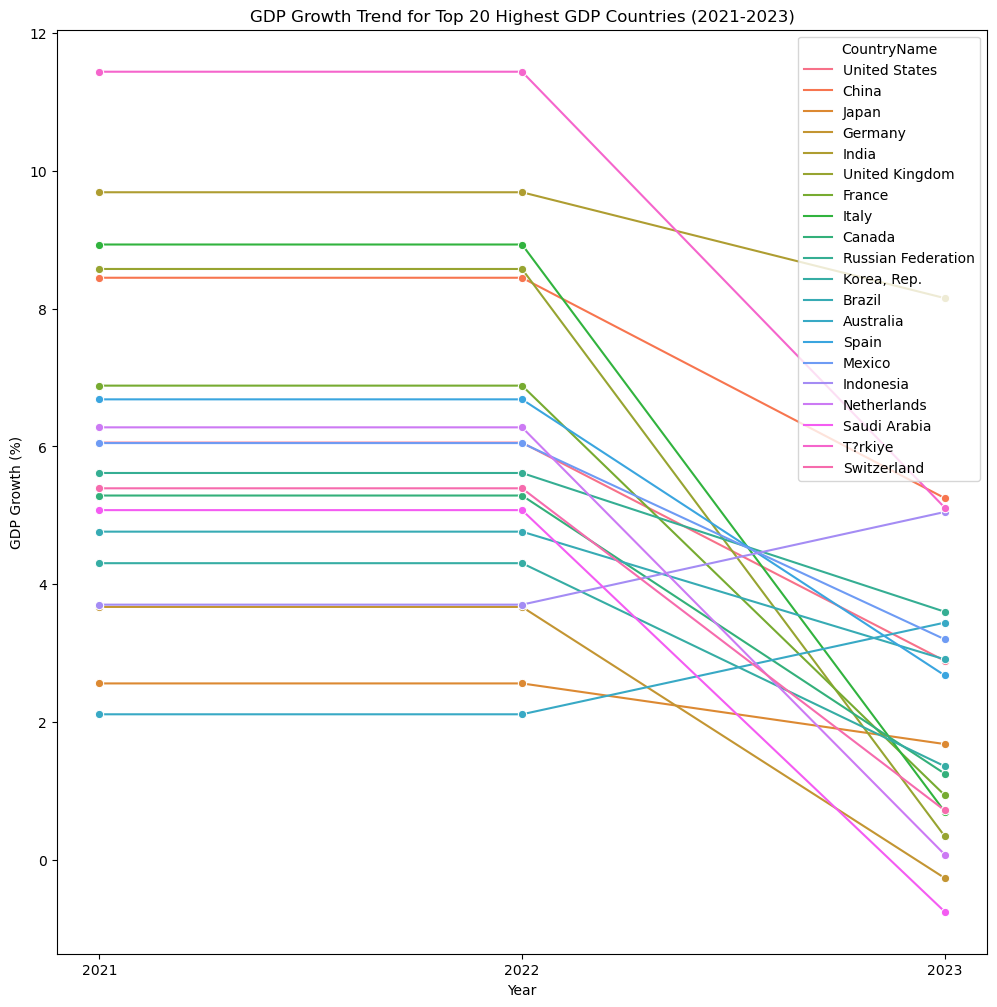

In [15]:
# the GDP growth trend for top 20 countries from 2021 to 2023

top20_gdp_2022['Year'] = 2022
top20_gdp_2023['Year'] = 2023

combined_gdp_growth = pd.concat([top20_gdp_2021[['CountryName', 'Year', 'GDPGrowth']],
                                 top20_gdp_2022[['CountryName', 'Year', 'GDPGrowth']],
                                 top20_gdp_2023[['CountryName', 'Year', 'GDPGrowth']]])


plt.figure(figsize=(12, 12))
sns.lineplot(data=combined_gdp_growth, x='Year', y='GDPGrowth', hue='CountryName', marker='o')

# Customize the x-axis to only show 2021, 2022, and 2023
plt.xticks([2021, 2022, 2023])

plt.title('GDP Growth Trend for Top 20 Highest GDP Countries (2021-2023)')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.show()

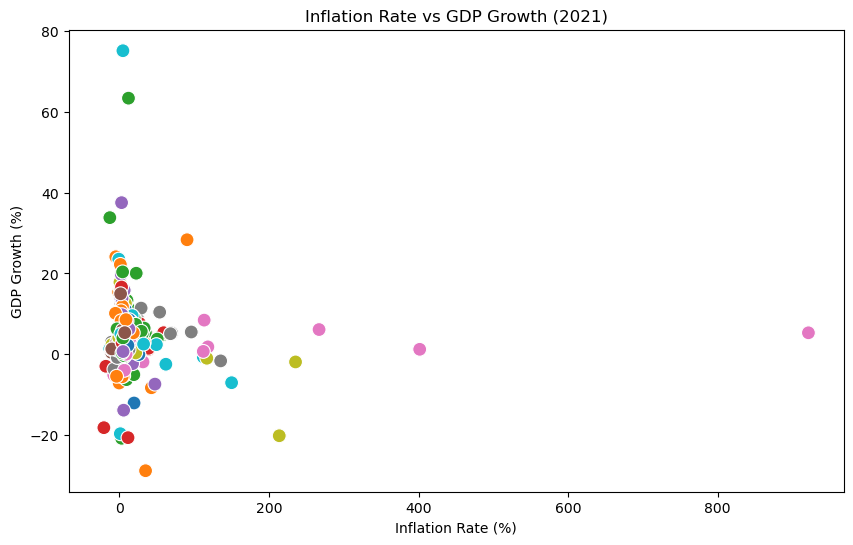

In [16]:
# Inflation Rate vs GDP Growth

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='InflationRate', y='GDPGrowth', hue='CountryName', palette='tab10', s=100)
plt.title('Inflation Rate vs GDP Growth (2021)')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP Growth (%)')
plt.legend([],[], frameon=False)  # Remove legend
plt.show()

In [17]:
# impute missing values 

columns_with_nulls = [col for col in df.columns if df[col].isnull().any() and col != 'IncomeLevel']
imputer = KNNImputer(n_neighbors=5)
df[columns_with_nulls] = imputer.fit_transform(df[columns_with_nulls])
print(df[columns_with_nulls].isna().sum())

FDINet                                             0
FDIInflowstoGDP                                    0
FDIInflows                                         0
FDIOutflowsPercent                                 0
FDIOutflows                                        0
GDP                                                0
GDPGrowth                                          0
GrossNationalSpending                              0
InflationConsumerPrices                            0
InflationRate                                      0
InflationPercent                                   0
GoodsNetTrade                                      0
GoodsandServicesNetTrade                           0
TradePercent                                       0
ServicesTradedPercent                              0
Government Spending to GDP                         0
Government Spending Annual Growth                  0
Government Spending                                0
Government Education Spending to GDP          